In [ ]:
# Dựa trên các điểm thi đánh giá năng lực
# hãy phán đoán xem sinh viên có định hướng nghề nghiệp 
# hay chưa được định hướng nghê nghiệp 

# input ̣features: Ngôn ngữ, Logic, Ứng xử
# output (target) Định hướng (chỉ có Yes, No)
# nên là bài toán  phân lớp: Logistic
# LÀ loại Supervised

# input(Features) --> model --> Target 
#         (Logistic)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df= pd.read_csv('dulieuxettuyendaihoc.csv', header=0,delimiter=',', encoding ='utf-8')


In [3]:
df = df[['NGONNGU','TOANLOGICPHANTICH','GIAIQUYETVANDE','DINHHUONGNGHENGHIEP']]


In [5]:
df

,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,DINHHUONGNGHENGHIEP
0,3.25,3.25,4.50,No
1,6.00,4.00,3.50,Yes
2,5.00,6.75,4.00,No
3,4.25,4.25,5.25,No
4,4.25,4.50,5.00,No
...,...,...,...,...
95,5.25,1.50,6.25,Yes
96,5.25,3.75,4.75,No
97,7.00,8.00,4.00,Yes
98,5.00,3.50,5.50,No


In [8]:
df.rename(columns={'NGONNGU':'NN','TOANLOGICPHANTICH':'LG','GIAIQUYETVANDE':'UX','DINHHUONGNGHENGHIEP':'DH'},inplace=True)

In [9]:
df.head()

,NN,LG,UX,DH
0,3.25,3.25,4.50,No
1,6.00,4.00,3.50,Yes
2,5.00,6.75,4.00,No
3,4.25,4.25,5.25,No
4,4.25,4.50,5.00,No


In [10]:
dinhhuong=pd.get_dummies(df['DH'])
dinhhuong

,No,Yes
0,True,False
1,False,True
2,True,False
3,True,False
4,True,False
...,...,...
95,False,True
96,True,False
97,False,True
98,True,False


In [12]:
dinhhuong.drop('No',axis=1,inplace=True)
dinhhuong

,Yes
0,False
1,True
2,False
3,False
4,False
...,...
95,True
96,False
97,True
98,False


In [13]:
df=pd.concat([df,dinhhuong],axis=1)
df.head(5)

,NN,LG,UX,DH,Yes
0,3.25,3.25,4.50,No,False
1,6.00,4.00,3.50,Yes,True
2,5.00,6.75,4.00,No,False
3,4.25,4.25,5.25,No,False
4,4.25,4.50,5.00,No,False


In [15]:
df.drop('DH',axis=1,inplace=True)
df

,NN,LG,UX,Yes
0,3.25,3.25,4.50,False
1,6.00,4.00,3.50,True
2,5.00,6.75,4.00,False
3,4.25,4.25,5.25,False
4,4.25,4.50,5.00,False
...,...,...,...,...
95,5.25,1.50,6.25,True
96,5.25,3.75,4.75,False
97,7.00,8.00,4.00,True
98,5.00,3.50,5.50,False


In [16]:
x=df[['NN','LG','UX']].values # input frature dac Trung
y=df[['Yes']].values # output muc tieu (Target)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 0.2,random_state=16)


In [21]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(x_train,y_train.flatten()) 
# flatten() đổi ra dạng số 

LogisticRegression()

In [24]:
model.coef_
# đặc trưng của mảng

array([[ 0.31978112, -0.04309514,  0.02891314]])

In [25]:
model.intercept_
#hệ số góc của mô hình

array([-1.29714816])

In [26]:
# mô hình 
            # Z= -1.297+0.319*NN-0.043*LG+0.0289*UX
            # (DH) --f(z)=1/(z+e^-z)(Singmoid)-->Z'[0.1]---Threshold(ngưỡng)--> [0.1] 

In [32]:
z=-1.29714816+0.31978112*3.75-0.04309514*4.5+0.02891314*4.25
z

-0.16901624500000018

In [33]:
import math 
z_= 1/(1+math.exp(-z))
z_

0.45784623975692024

In [38]:
N=4.75
L=2.0
U=5.5
z=-1.29714816+0.31978112*N-0.04309514*L+0.02891314*U
print(z)
z_= 1/(1+math.exp(-z))
print(z_)
# có định hướng và z_ trên 0.5 là yes=1 


0.29464414999999977
0.5731327156723902


In [40]:
x_test

array([[3.75, 4.5 , 4.25],
       [4.75, 2.  , 5.5 ],
       [3.5 , 4.75, 3.5 ],
       [5.75, 3.5 , 4.25],
       [4.75, 6.5 , 8.  ],
       [2.75, 3.75, 5.  ],
       [2.25, 3.5 , 5.  ],
       [3.75, 4.  , 3.5 ],
       [2.  , 5.25, 3.5 ],
       [4.  , 4.75, 5.5 ],
       [5.  , 4.  , 6.75],
       [2.5 , 3.5 , 6.5 ],
       [5.25, 4.5 , 4.75],
       [4.25, 2.75, 3.25],
       [5.  , 3.5 , 5.5 ],
       [1.5 , 4.5 , 5.5 ],
       [4.75, 4.75, 4.5 ],
       [6.5 , 4.5 , 8.  ],
       [2.25, 4.  , 4.25],
       [2.5 , 2.75, 5.5 ]])

In [41]:
# default  threshold is 0.5
y_pred_test = model.predict(x_test)
y_pred_test 
 
 # cách đọc là dựa trên một hàng ở trên so xuống dưới nhìn True hay False

array([False,  True, False,  True,  True, False, False, False, False,
       False,  True, False,  True,  True,  True, False,  True,  True,
       False, False])

In [42]:
print(model.predict_proba(x_test))

[[0.54215376 0.45784624]
 [0.42686728 0.57313272]
 [0.56989436 0.43010564]
 [0.37434035 0.62565965]
 [0.45685782 0.54314218]
 [0.60701717 0.39298283]
 [0.64196612 0.35803388]
 [0.54218784 0.45781216]
 [0.68624869 0.31375131]
 [0.51592045 0.48407955]
 [0.41956957 0.58043043]
 [0.61315482 0.38684518]
 [0.41943042 0.58056958]
 [0.49065667 0.50934333]
 [0.42312774 0.57687226]
 [0.70106665 0.29893335]
 [0.46326149 0.53673851]
 [0.30601715 0.69398285]
 [0.65184076 0.34815924]
 [0.6123461  0.3876539 ]]


In [43]:
# Target đầu ra chọn là cột Yes 
# với cái điểm số 3.75, 4.5 , 4.25
# chạy vào ra 2 giá trị 0.54215376 0.45784624
# cột no  0.54215376|||| Cột Yes   0.45784624
# xác xuất chạy ra bên Yes thì==>yes như bé hơn 0.5 ==> yes =0 không định hướng
# xác xuất chạy ra bên No thì==>No như lớn hơn 0.5 ==> No=1 không định hướng


<h5>Cách điều chỉnh ngưỡng

In [49]:
print('prediction with threshold 0.65:')
y_pred_test_new_threshold = (model.predict_proba(x_test)[:,1]>=0.65).astype(int)
y_pred_test_new_threshold

prediction with threshold 0.65:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [50]:
# nếu ngưỡng càng cao giá trij 0 càng nhiều == không định hướng
# bộ lọc càng nhỏ thì giá trị 1 càng nhiều==> có đinhj hướng

<h5> đánh giá 

In [51]:
# default threshold =0.5
result = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred_test})
result
# đúng được 7 trên 20 vì 2 cái đó giống nhau là đúng 
# 7/20*100=35% (Accuracy: độ chính xác càng cao mô hình càng tốt càng đáng tin cậy)

,Actual,Predicted
0,True,False
1,False,True
2,True,False
3,True,True
4,False,True
5,False,False
6,False,False
7,True,False
8,False,False
9,True,False


In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_test)
# để tính độ chính xác của dữ liệu 

0.35

In [55]:
# True =1 , Flase = 0
# TP(Actual=1,Predicted=1)=2
# FP(Actual=0,pred=1)=7
# Fn(ACt=1,pred=0)=6
# Tn(Act=0,pred=0)=5

# dự báo đúng là TP và Tn 
# Accuracy = (TP+Tn)/(Tp+Tn+Fp+Fn)
# Lập thành bảng gồm 4 ô
# --> Actual
# | piral
# 0 TN|FP       00||01
# 1 FN|TO       10||11
# ==> Ma trận Confusion Matrix

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_pred_test)
cf_matrix

array([[5, 7],
       [6, 2]], dtype=int64)

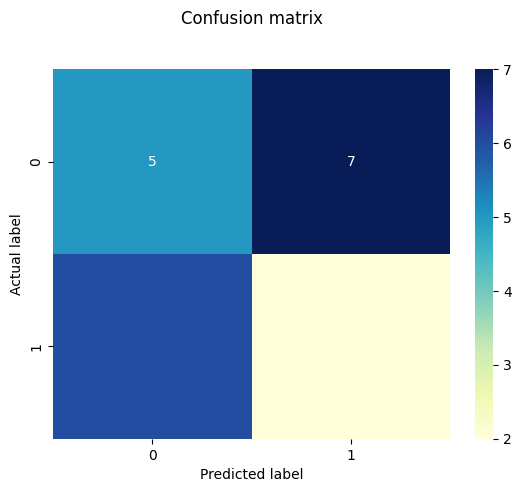

In [56]:
sns.heatmap(pd.DataFrame(cf_matrix),
            annot=True,cmap="YlGnBu",fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Các độ đo đánh giá mô hình phân lớp
# N là số lượng mẫu =TP+FP+Fn+Tn
# TP,FP,FN,TN
# accuracy=(TP+TN)/(TP+FP+Fn+Tn)
# Precission = Tp/(TP+FP)
# Recall= TP/(TP+FN)
# F1-Score= 2*Precision*Recall/(Precision*Recall)

In [57]:
from sklearn.metrics import classification_report
target_names=['Không định hướng','Định hướng']
print(classification_report(y_test,y_pred_test,target_names=target_names))

                  precision    recall  f1-score   support

Không định hướng       0.45      0.42      0.43        12
      Định hướng       0.22      0.25      0.24         8

        accuracy                           0.35        20
       macro avg       0.34      0.33      0.34        20
    weighted avg       0.36      0.35      0.35        20



In [58]:
# đồ thij AUC và ROC dùng để đnash giá mô hình
# viền màu xanh dưới màu đỏ thì là mô hình xấu
# miền màu xanh phủ hết hình nền bao nhiêu mô hình tốt bấy nhiêu 

In [59]:
import pickle
pickle.dump(model,open('model_logistic_regression.sav','wb'))

In [63]:
# cách đọc lại file
loaded_model= pickle.load(open('model_logistic_regression.sav','rb'))

vNN=float(input('Nhập điểm NN: '))
vLG=float(input('Nhập  điểm LG: '))
vUX=float(input('Nhập  điểm UX: '))

y_pred = loaded_model.predict([[vNN,vLG,vUX]])
print('Dự báo định hướng :' +str(y_pred[0]))

Dự báo định hướng :True
